# Data preprocessing

In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# laod dataset
df=pd.read_csv("G:\\data science  9th sep batch\\capstone project\\WA_Fn-UseC_-Telco-Customer-Churn_G9_new (1).csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
#feature types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
#y is dependent variable and x is independent variable
y=df['Churn']
x=df.drop(['Churn'],axis=1)
print(y.shape)
print(x.shape)

(7043,)
(7043, 20)


In [ ]:
#finding missing values
print(df.isna().sum())

In [8]:
print(df.shape)

(7043, 21)


In [84]:
#droped column having missing value
df.dropna(axis=1,inplace=True)
print(df.shape)

(7043, 19)


In [85]:
#check coloumn has removed or not
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
#false indicated there is no duplicate value and if there will be true then will indicate duplicated value in that row.
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [11]:
#Check if how many duplicated rows in dataset
df.duplicated().sum()

0

#conclusion= required preprocessing of data like if we identify type then can perform codes as per it ,if duplicate rows and null values then required to remove for more accuracy of data and can apply different methods to impute value in place of null value.

# Feature selection

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [13]:
df2=pd.read_csv("G:\\data science  9th sep batch\\capstone project\\WA_Fn-UseC_-Telco-Customer-Churn_G9_new (1).csv")
df2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [16]:
df2.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      5
TotalCharges        0
Churn               0
dtype: int64

In [51]:
print(df2['gender'].value_counts())
print(df2['InternetService'].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


## label encoding is encoding in binary form according to alphabet mostly applied in nominal feature instead of ordinal .

# label encoding in gender feature

In [71]:
#import label encoder from scilit learn
from sklearn.preprocessing import LabelEncoder
#print unique value of gender column

print(df2['gender'].unique())
# do label encoding in unique integer

gender_encoder = LabelEncoder()
print(df2['gender'])
# Mapping Table created

gender_encoder.fit(df2['gender']) 
gender_values = gender_encoder.transform(df2['gender'])


print(gender_encoder.classes_)

['Female' 'Male']
0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
7038      Male
7039    Female
7040    Female
7041      Male
7042      Male
Name: gender, Length: 7043, dtype: object
['Female' 'Male']


In [73]:
#first seven integers from list before encoding
print("Before Encoding:", list(df['gender'][0:8]))
#first seven binary value after encoding
print("After Encoding:", gender_values[0:8])

#last ten binary value 
print("The inverse from the encoding for", gender_values[:10])
#coverted binary value in its integer
print("The inverse from the encoding result:", gender_encoder.inverse_transform(sex_values[:10]))

Before Encoding: ['Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female']
After Encoding: [0 1 1 1 0 0 1 0]
The inverse from the encoding for [0 1 1 1 0 0 1 0 0 1]
The inverse from the encoding result: ['Female' 'Female' 'Female' 'Female' 'Male' 'Male' 'Male' 'Female' 'Male'
 'Female']


# Label encoding in 'internet service'

In [74]:
##print unique value of internetservice column
print(df['InternetService'].unique())

# do label encoding in unique integer
internet_encoder = LabelEncoder()
# Mapping Table created
print(df['InternetService'])
internet_encoder.fit(df['InternetService']) 
internet_values = sex_encoder.transform(df['InternetService'])

print(internet_encoder.classes_)

['DSL' 'Fiber optic' 'No']
0               DSL
1               DSL
2               DSL
3               DSL
4       Fiber optic
           ...     
7038            DSL
7039    Fiber optic
7040            DSL
7041    Fiber optic
7042    Fiber optic
Name: InternetService, Length: 7043, dtype: object
['DSL' 'Fiber optic' 'No']


In [60]:
#first seven integers from list before encoding
print("Before Encoding:", list(df['InternetService'][0:8]))
#first seven binary value after encoding
print("After Encoding:", internet_values[0:8])

#last ten binary value 
print("The inverse from the encoding for", internet_values[:10])
#coverted binary value in its integer
print("The inverse from the encoding result:", internet_encoder.inverse_transform(sex_values[:10]))

Before Encoding: ['No', 'DSL', 'Fiber optic', 'DSL', 'Fiber optic', 'Fiber optic']
After Encoding: [2 0 1 0 1 1]
The inverse from the encoding for [0 0 0 0 1 1 1 0 1 0]
The inverse from the encoding result: ['DSL' 'DSL' 'DSL' 'DSL' 'Fiber optic' 'Fiber optic' 'Fiber optic' 'DSL'
 'Fiber optic' 'DSL']


# #Scaling using 'min -max scaling ' also called normalization method

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
#assign variable and check min max value and type
y1 = df['MonthlyCharges']
print(type(y1))
print(y1.max())
print(y1.min())
y1

<class 'pandas.core.series.Series'>
118.75
18.25


0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

In [82]:
# (A) Min-Max Scaling using formula reason to find out scaling between 0 to 1 and to remove decimal value
a = 100
b = 200
y1_new = a + ( (y1-min(y1))/(max(y1)-min(y1)) * (b-a) )

print(y1_new.max())
print(y1_new.min())

y1_new

200.0
100.0


0       111.542289
1       138.507463
2       135.422886
3       123.930348
4       152.189055
           ...    
7038    166.218905
7039    184.527363
7040    111.293532
7041    155.870647
7042    186.965174
Name: MonthlyCharges, Length: 7043, dtype: float64

In [78]:
# find rangeof minimum and max value of each row of internet service coloumn
y1_new = (y1-min(y1))/(max(y1)-min(y1))
print(y1_new.max())
print(y1_new.min())
df['InternetService'] = y1_new
y1_new

1.0
0.0


0       0.115423
1       0.385075
2       0.354229
3       0.239303
4       0.521891
          ...   
7038    0.662189
7039    0.845274
7040    0.112935
7041    0.558706
7042    0.869652
Name: MonthlyCharges, Length: 7043, dtype: float64

In [79]:
#range of minimum and maximum value
print(df['InternetService'].max())
print(df['InternetService'].min())

1.0
0.0


In [80]:
# (B) Mean Normalization
y1_new = (y1-np.mean(y1))/(max(y1)-min(y1))
print(y1_new.max())
print(y1_new.min())
print(np.mean(y1))
y1_new

0.5373593809865135
-0.4626406190134865
64.7453822108554


0      -0.347218
1      -0.077566
2      -0.108412
3      -0.223337
4       0.059250
          ...   
7038    0.199548
7039    0.382633
7040   -0.349705
7041    0.096066
7042    0.407011
Name: MonthlyCharges, Length: 7043, dtype: float64

#conclusion = encoding and feature scaling is required to convert integer value into float so that machine would understand numeric value and can make it easy in 'machine learning '.

# Univariate analysis


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# laod dataset
df=pd.read_csv("G:\\data science  9th sep batch\\capstone project\\WA_Fn-UseC_-Telco-Customer-Churn_G9_new (1).csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
#print type,shape and columns name of dataframe
print(type(df))
print(df.shape)
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
(7043, 21)
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [4]:
#find out numbers from top and bottom rows of coloumns
print(df.head)
print(df.tail)
df.info

<bound method NDFrame.head of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL   

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [5]:
#type of data should be known so that selection of features would be appropriate for visualization
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
#identify different values of numeric feature
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7038.000000
mean,0.162147,32.371149,64.745382
std,0.368612,24.559481,30.091927
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
#indentify null value if any in columns
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      5
TotalCharges        0
Churn               0
dtype: int64

In [8]:
#find number of unique values in coloumns
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

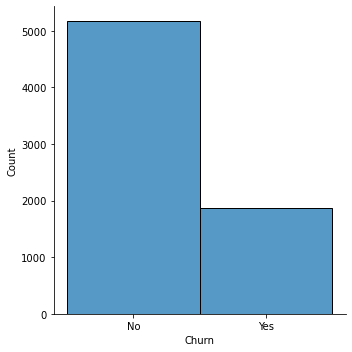

In [9]:
#univariate Analysis of categorical feature using histogram
sns.displot(df['Churn'],bins=5)

In [10]:
#find unique value and numbers of it of another feature
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

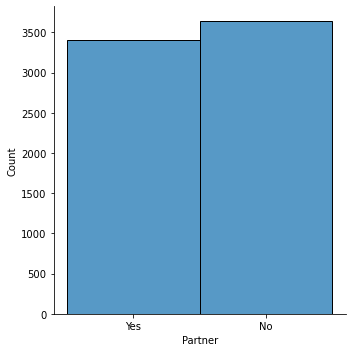

In [11]:
#create visualization of categorical feature
sns.displot(df['Partner'],bins=10)

# conclusion :those customer who have not churned has a maximum number of partners and those have churned having less number of partners.

<AxesSubplot:xlabel='Churn', ylabel='count'>

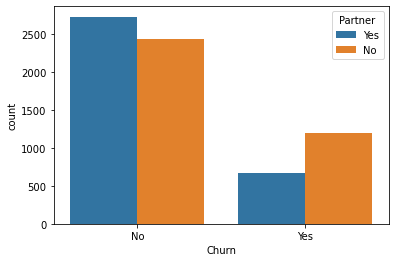

In [12]:
#countplot of features  
sns.countplot(x='Churn',hue='Partner',data=df)

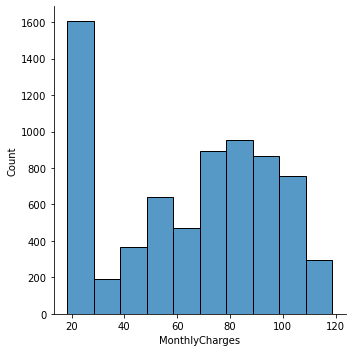

In [13]:
#create histogram using numeric feature
sns.displot(df['MonthlyCharges'],bins=10)

<AxesSubplot:ylabel='MonthlyCharges'>

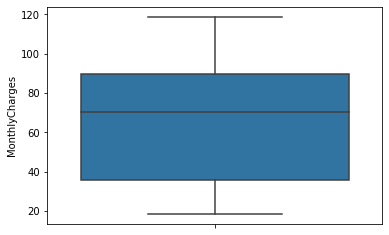

In [14]:
#create boxplot to handle outlier
sns.boxplot(y='MonthlyCharges', data= df )

# no outliers have found means will not impact more and will give more accurate result while performing ML.

70.35
118.75
18.25
64.7453822108554
-0.21970427250592506


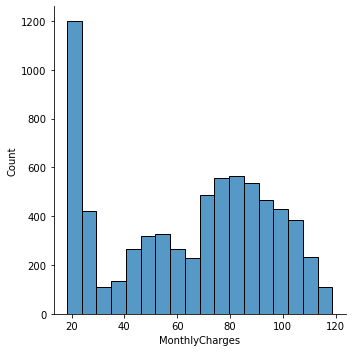

In [15]:
#Identify mean, median ,mode to analyse skewness of the features
sns.displot(x='MonthlyCharges', data= df )
print(df['MonthlyCharges'].median())
print(df['MonthlyCharges'].max())
print(df['MonthlyCharges'].min())
print(df['MonthlyCharges'].mean())

### Compute skewness
print(df['MonthlyCharges'].skew())

In [16]:
#identify moderate,negative or positive skewness
df.skew()

C:\Users\Mukesh\AppData\Local\Temp\ipykernel_4392\4272757956.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.219704
dtype: float64

Following features are negative skewed


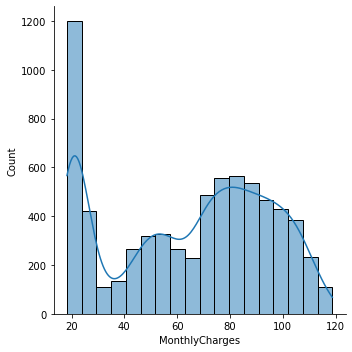

In [18]:
# IDENTIFY SKEWNESS"
print("Following features are negative skewed")
sns.displot(x='MonthlyCharges', data= df,kde=True )

# Bivariate analysis

In [19]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7038.000000
mean,0.162147,32.371149,64.745382
std,0.368612,24.559481,30.091927
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [20]:
#identify matrix table
mymatrix=df.corr()
mymatrix

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220243
tenure,0.016567,1.000000,0.247788
MonthlyCharges,0.220243,0.247788,1.000000


<AxesSubplot:>

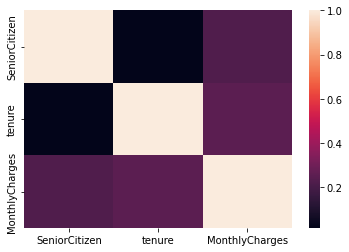

In [21]:
#create heatmap to identify numeric correlation
sns.heatmap(mymatrix)

<AxesSubplot:>

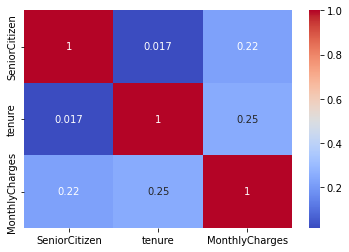

In [22]:
#Heatmap with labels
sns.heatmap(mymatrix,annot=True,cmap='coolwarm')

conclusion: value one means highly corelated and o.2 is less correlated i.e like senior citizen and tenure is less correlated as compare to monthly charges and senior citizen

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

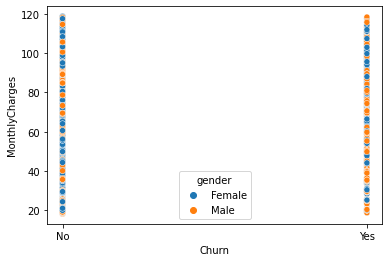

In [23]:
#drawn scatter plot
sns.scatterplot(y='MonthlyCharges',x='Churn',data=df,hue='gender')

conclusion:Can interpret more number of female are retained as compare to male

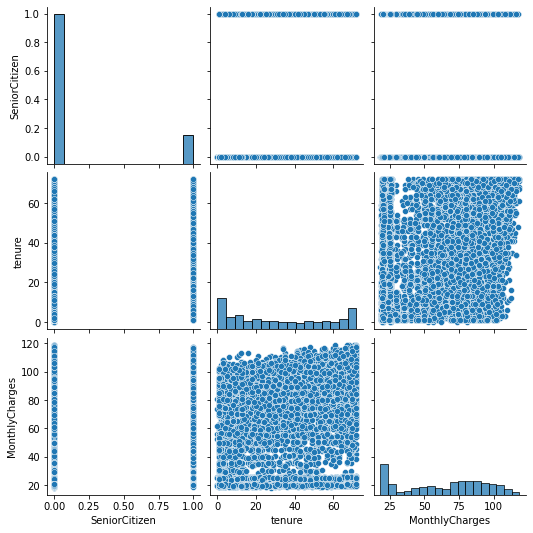

In [24]:
#drawn pairplot to indentify distribution
sns.pairplot(df)

<h3 style='color:red'> # Comments </h3>
    <h4 style='color:red'> 1) Data pre-processing (10 marks)  </h4> 
<h5 style='color:blue'>                                                                                
You have addressed all the points in this section. Following are the observations/ suggestions that may be taken care of- <br>
- a. Analyse data types of features: <br>
     ----- Data types checked with dtypes. <br>
    ----- Number of features or columns which are object/ integer type in dataset may be mentioned <br> 
    ----- For any feature, if data type is not appropriate, it may be updated <br> 
 <br>
- b. Identify dependent and independent features: Mentioned correctly <br>
     ----- The independent features are all features other than ‘Churn’ column (a dependent feature) initially. 
     ----- ‘Churn’ alone is a dependent feature. (Only last column and not others. Y = df.iloc[:,-1].values may be used as well for last column (Churn)<br>
<br>
- c. Check for duplicate rows if any: <br> 
      ----- Duplicates checked. <br>
<br>
- d. Check for null values data and remove if any with appropriate method: <br> 
      ----- Null values checked but column dropped. As only 5 values out of 7043 are missing, we should remove those rows, not columns. <br>
      ----- You can fill null values with mean or other imputation method. <br>
</h5> 
<h5 style='color:green'>                                   
<u> Marks scored: 8 </u><br>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------    
</h5>     

<h4 style='color:red'> 2) Univariate analysis (15 marks)  </h4> 
<h5 style='color:blue'>                                                                                Learner has addressed all the points in this section. Following are the observations/ suggestions that may be taken care of- <br>
- a. Remove outliers: <br>
--------- Boxplots have been used for visualization. <br>
--------- Outliers are checked for all variables.  <br>
--------- Statistical parameters may be used as well.  <br>
<br>
- b. Categorical features: countplot, numeric features, histogram: <br>
     ----- countplot has been drawn for discrete variable having very few unique values. <br>
     ----- Histograms drawn with distplot(); bin parameter is also set. But using ‘Churn’ or ‘Partner’ feature which is categorical in inappropriate. For numeric features, we draw histogram <br>
  <br>
- c. Identify skewed features: <br> 
      ----- Skweness has been computed <br>
      ----- Skewness type (Positive or negative) has been visualized from values. <br> 
<h5 style='color:green'>                                   
<u> Marks scored: 12 </u><br>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------    
</h5>    
<h4 style='color:red'> 3) Bivariate analysis (15 marks)   </h4>
<h5 style='color:blue'>                                                                                Learner has addressed all the points in this section. Following are the observations/ suggestions that may be taken care of- <br>
- a. Using correlation with heatmap: <br> 
     ----- Computed corr() and heatmap demonstrated. <br>
<br>
- b. Scatter plot with hue parameter: <br>
     ----- Scatterplot drawn. Both variables may be floats/ints always. No categorical variable. <br>
     ----- hue parameter has variable with few discrete values <br>
<br>
- c. Pair plot:  <br>
     ----- Pair plot drawn <br>
     ----- With pair plot ‘hue’ parameter has been used </h5> 
<h5 style='color:green'>                                   
<u> Marks scored: 12 </u><br>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------    
</h5>    
<h4 style='color:red'> 4) Feature engineering (10 marks) </h4>
<h5 style='color:blue'>    Following are the observations/ suggestions that may be taken care of- <br>
- a. Apply any scaling method to at least two independent features: <br>
     ----- Scaling methods must be applied for numeric variables. <br>
    <br>
- b. Convert categorical features into numeric one using appropriate encoding
techniques:  <br> 
     ----- Encoding has been done with LabelEncoder() for one or two variables. ‘InternetService’ feature for which Encoding is done should not be used for scaling. <br> 
     ----- dummies() or map() or replace() may be used. <br> 
    <br>
     ----- NOTE: Actually, normalize/scaling may be done for every numeric feature of dataset, when working on DATA SCIENCE PROJECT. <br> 
     ----- NOTE: Actually, encoding may be done for each and every categorical feature, when working on DATA SCIENCE PROJECT. <br> 
    <br>
</h5> 
<h5 style='color:green'>                                   
<u> Marks scored: 7 </u><br>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------    
</h5>        

<h5 style='color:red'>                                   
<u> Total Marks scored: 39  </u><br>
    <br>
<b> CONGRATULATIONS!!! You have successfully completed your capstone project. You will receive a certificate from the LMS team. </b><br>
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------    
</h5>
